# The value of values

What is, in science, the value of a value? In physics, this depends on how certain you are of this value. As quantities are determined using experiments, and these experiments are subject to error and uncertainties, the value can only be determined to some degree. We are never 100\% sure of the exact value. Therefore, values are given with their uncertainty: $g$ = 9.81 $\pm$ 0.01 m/s$^2$. So how do we determine to what extent a value is certain?



## Errors and uncertainty
Uncertainties in values can arise from the precision of the instruments used in the experiment, errors made by the person doing the experiment, vibrations, temperature effects, and fundamental errors related to the phenomenon being studied. Some of these uncertainties can be reduced, others just have to be accepted. Whatever their cause, these effects influence experiments and their outcomes of the experiments and therefore influence the uncertainty in the quantities we want to determine. 

```{figure} /figures/reading.png
:name: fig:reading
width: 70%
It is difficult to read the exact value, the uncertainty is in the last decimal: 17.3 $\pm$  0.3 V.
```



### Gaussian noise
Random errors will usually conform to a Gaussian distribution. The probability of an error of some sort occurring can be calculated through:

$$ P(x) = \frac{1}{\sigma \sqrt {2\pi}}e^{{{ - \left( {x - \mu} \right)^2 }  \mathord{\left/ {\vphantom {{ - \left( {x - \mu } \right)^2 } {2\sigma ^2 }}} \right. \kern 0.2em} {2\sigma ^2 }}} $$ (eq:gaussian)

In this function, $\mu$ is the average value of the error, $\sigma$ the standard deviation, a measure of the spread of the error, $x$ is the value of the error. In section \ref{sec:RM} we assume that the errors we have to deal with are following a Gaussian distribution. Figure \ref{fig:noise_a} shows what Gaussian noise looks like, following the probability density function shown in Figure \ref{fig:noise_b}

```{figure} /figures/noise.png
:name: fig:noise_a
width: 70%
A scatter plot of the noise. Although most data are in between -25 and 25, one can find data points with values $>$50.
```

```{figure} /figures/noisehist.eps
:name: fig:noise_b
width: 70%
A histogram of the noise. One can easily see that roughly 2/3 of the data is within $\mu \pm \sigma$ and 90$\%$ is within $2\sigma$.
```


In [67]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit 
from scipy import special
from sympy import init_printing

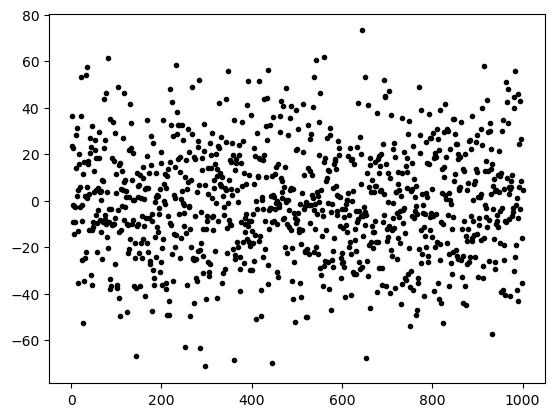

(a) A scatter plot of the noise. Although most data
are in between -25 and 25, one can find data points
with values >50.


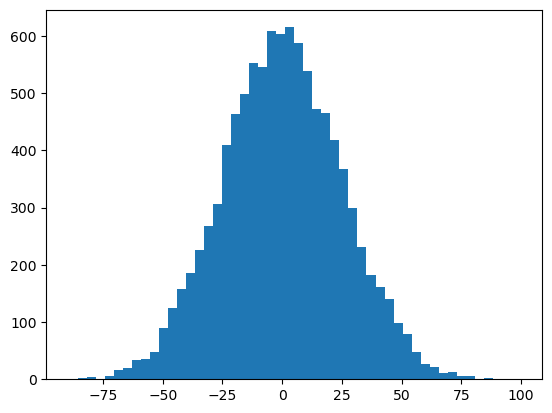

(b) A histogram of the noise. One can easily see that
roughly 2/3 of the data is within µ ± σ and 90% 



In [68]:
mu = 0
sigma = 25
N = 10000 #number of data points

y = np.random.normal(mu,sigma,N) #noise creation
x = np.linspace(1,N,N)

plt.figure()
plt.plot(x[:1000],y[:1000],'k.')
plt.show()
print("""(a) A scatter plot of the noise. Although most data
are in between -25 and 25, one can find data points
with values >50.""")

plt.hist(y,bins = 50) #bins chosen relatively large, but at random
plt.show()
print("""(b) A histogram of the noise. One can easily see that
roughly 2/3 of the data is within µ ± σ and 90% 
""")


### Systematic error
If there is, e.g., a calibration error of the instrument, a systematic error occurs with each and every measurement. If your ruler starts at 0.2 cm but you didn't notice, this will cause a systematic error.

```{figure} /figures/Meetfout.eps
:name: fig:meetfout
width: 70%
A not calibrated instrument will probably result in a systematic error.
```

If you suspect a systematic error, you can look for it using e.g. Python. If the to be fitted function is $F = \frac{\alpha}{r^4}$ and you suspect a systematic error in the distance, $r$, you can try to fit the function $F =\frac{\alpha}{(r+\Delta r)^4}$. You still have to validate whether the systematic error is within a sensible range and whether there is indeed a systematic error, see {numref}`figure {number} <fig:noise>`.


Figuring out whether you have the problem of a systematic error can be done by analysing the residuals. If $M(x)$ are the values of your measurements at certain point $x$, and $F(x)$ is the value of the fitted function at the same point $x$, the residuals are defined by $R(x)=M(x)-F(x)$ .

```{figure} /figures/quad_without.eps
:name: 
width: 70%
A curve fit using least square method without compensation for a systematic error $\left(y=a\cdot x^2\right)$.
```

```{figure} /figures/quad_with.eps
:name: fig:noise
width: 70%
A curve fit using least square method with compensation for a systematic error $\left(y=a\cdot (x + \Delta x)^2\right)$.
```




(sec:RM)=
## Repeating measurements
Repeating a measurement helps us determine the 'exact' value. The best estimate of the exact value is the mean:

$$ \overline{x}=\frac{\sum_{i=1}^{N} x_i}{N} $$ (eq:mean)

in which $x_i$ is a measurement and $N$ is the number of repeated measurements.

In the analysis of experimental data, an important parameter is the standard deviation, $\sigma$. If the experiment is done again, the chance that the value is between $\overline{x}\pm\sigma$ is 2/3. The standard deviation is calculated by

$$ \sigma = \sqrt{\frac{\sum_{i=1}^N (x_i-\overline{x})^2}{N-1}}$$ (eq:stdev)

There is another way to determine the standard deviation more quickly, but this is somewhat less accurate (the rough-and-ready approach). The standard deviation is roughly $\frac{2}{3}(x_{max}-\overline{x})$.

If the same experiment is repeated, the average value will differ slightly each time. This means that their is an uncertainty within the average. This parameter is called the standard deviation of the mean, $\alpha$:

$$ \alpha = \frac{\sigma}{\sqrt{N}} $$ (eq:uncertainty)

This uncertainty tells you that if the entire experiment is repeated, there is a 2/3 change that the average value is within $\overline{x} \pm \alpha$.

```{figure} /figures/noise_average.pdf
:name: fig:1a
width: 70%
The average value of $N$ noise samples. It  can be clearly seen that the value converges to 0.
```

```{figure} /figures/noise_sigma.pdf
:name: fig:1b
width: 70%
The standard deviation of $N$ noise samples. It can be clearly seen that the value converges to 25.
```

```{figure} /figures/noise stderror.eps
:name: fig:1c
width: 70%
The standard error of $N$ noise samples. It can be clearly seen that the uncertainty decreases.
```

The average, standard deviation and standard error as function of $N$ noise samples. It can be seen that the average and standard deviation do not change much and only get better determined. The standard error decreases with $\sqrt{N}$.figure}


<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:32: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:32: SyntaxWarning: invalid escape sequence '\c'
C:\Users\remi\AppData\Local\Temp\ipykernel_4536\8721593.py:20: SyntaxWarning: invalid escape sequence '\c'
  print("""(a) A curve fit using least square method without compensation for a systematic error y = a $\cdot$ x^2""")
C:\Users\remi\AppData\Local\Temp\ipykernel_4536\8721593.py:32: SyntaxWarning: invalid escape sequence '\c'
  print("""(b) A curve fit using least square method with compensation for a systematic error y = a $\cdot$ (x + \Delta x)^2""")


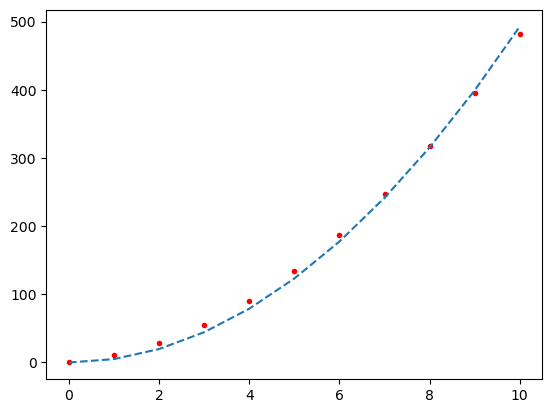

(a) A curve fit using least square method without compensation for a systematic error y = a $\cdot$ x^2


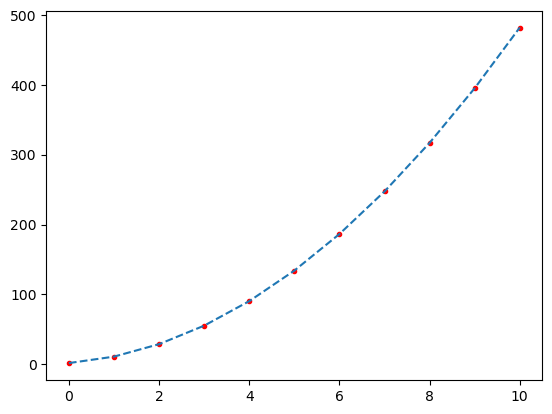

(b) A curve fit using least square method with compensation for a systematic error y = a $\cdot$ (x + \Delta x)^2


In [71]:
#create data
x = np.linspace(0,10,11)

def quadratic(x):
    return 4.3*(x+.6)**2 + np.random.normal(0,1)

y= quadratic(x)

#curvefit without systematic error
def solvex1(x,a):
    return a*x**2

pval_1, pcov_1 = curve_fit(solvex1,x,y)
y2 = solvex1(x,pval_1[0])

      
plt.plot(x,y,'r.')
plt.plot(x,y2,'--')
plt.show()
print("""(a) A curve fit using least square method without compensation for a systematic error y = a $\cdot$ x^2""")

#curvefit with system
def solvex2(x,a,b):
    return a*(x+b)**2

pval_2, pcov_2 = curve_fit(solvex2,x,y)
y3 = solvex2(x,pval_2[0],pval_2[1])

plt.plot(x,y,'r.')
plt.plot(x,y3,'--')
plt.show()
print("""(b) A curve fit using least square method with compensation for a systematic error y = a $\cdot$ (x + \Delta x)^2""")


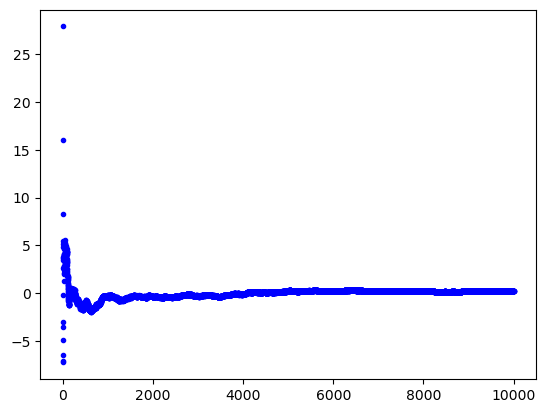

(a) The average value of N noise samples. It can be clearly seen that the value converges to 0.


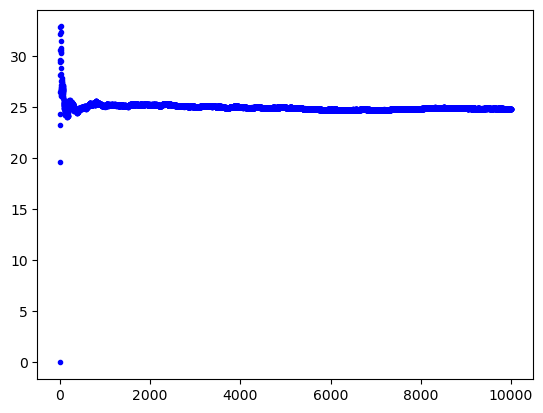

(b) The standard deviation of N noise
samples. It can be clearly seen that
the value converges to 25.


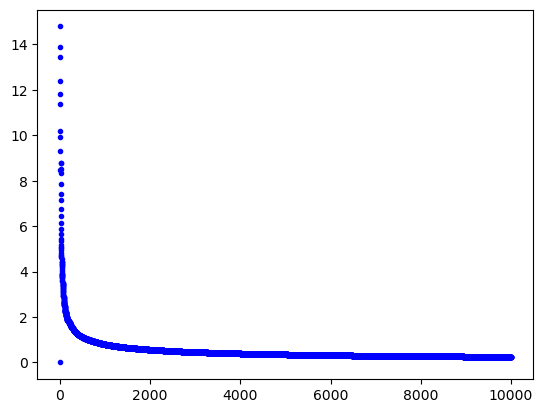

 (c) The standard error of N noise
samples. It can be seen that the uncertainty decreases.


In [72]:
mu = 0
sigma = 25
N = 10000 #number of data points

y = np.random.normal(mu,sigma,N) #noise creation
x = np.linspace(1,N,N)

#creates and fills list for average,std, and error against the number of data points used
av_n = []
std_n = []
error_n = []
for n in range(1,N+1):
    av_n.append(np.mean(y[:n]))
    std_n.append(np.std(y[:n]))
    error_n.append(std_n[-1]/np.sqrt(n))
    
plt.figure()
plt.plot(x, av_n, "b.")
plt.show()
print("""(a) The average value of N noise samples. It can be clearly seen that the value converges to 0.""")

plt.figure()
plt.plot(x, std_n, "b.")
plt.show()
print("""(b) The standard deviation of N noise
samples. It can be clearly seen that
the value converges to 25.""")

plt.figure()
plt.plot(x, error_n, "b.")
plt.show()
print(""" (c) The standard error of N noise
samples. It can be seen that the uncertainty decreases.""")


### Chauvenet's criterion
What if a measurement is repeated ten times, and one value is very different from the rest? Can it just be discarded?
To decide whether a value can be discarded, one can use the theory above and extend it. To start, you calculate the mean and the standard deviation. Subsequently you calculate the occurrence of the outlier $P_{out}$, using the error function: $P_{out}=2Erf(x_{out},\overline{x},\sigma)$. You can use [this site](https://www.danielsoper.com/statcalc/calculator.aspx?id=53) to use the error function 

If $N\cdot P_{out}$ is smaller than 0.5, the measurement may be discarded. Disregarding a measurement should be mentioned in the report! You also have to calculate a new mean value and uncertainty as the data set has changed.



#### Error Function(s)
There are two types of error functions, the $erf(x)$ and the $Erf(x_{out},\overline{x},\sigma)$. Which are defined like this:
    
$$erf(x) = \frac{2}{\sqrt{\pi}} \int_0 ^x e^{-t^2} dt$$ 

$$Erf(x,\overline{x},\sigma_x) = \frac{1}{2} \left[1+erf\left(\frac{x-\overline{x}}{\sqrt{2}\sigma_x}\right)\right]$$


The easiest way is to use the error function is to import it from the scipy package. A plot of both functions can be seen in {numref}`Figure {number} <fig:erfplots>`.

```{figure} /figures/erfplots.eps
---
name: fig:erfplots
width: 70%
---
2 plots, one with the $erf(x)$ (left) and one with the $Erf(x_{out},\overline{x},\sigma)$ (right), with $\overline{x} = 10$ and $\sigma = 5$.
```

What can be seen is that the  function $Erf(x_{out},\overline{x},\sigma)$ is basically a shifted version of the the $erf(x)$ function. As by dividing it by two and adding 0.5 shifts it up and makes it smaller. The $x_{out}-\overline{x}$ shifts it so that the mean is at the center of the function and dividing it by $\sigma$ 'stretches' the function so that it is in the right range. What one also can see if that when you have an outlier which is higher than the mean the $Erf$ will return a value higher than 0.5 which will always result in a value which cannot be discarded. When this happens you have to do $1-Erf(x_{out},\overline{x},\sigma)$, this you multiply by $2N$, or one can use:

$$ 1 - erf\left(\frac{|x_{out} - \overline{x}|}{\sigma}\right) $$ 

This you still have to multiply by $N$ (not by 2).


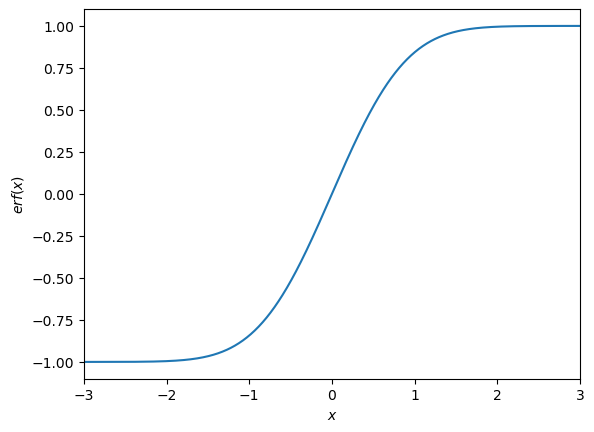

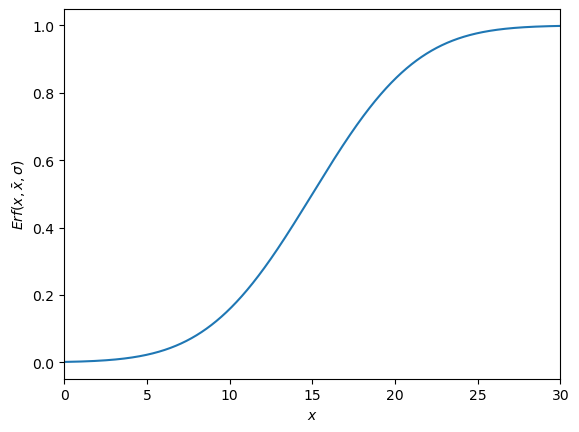

In [75]:
#erf(x)
x = np.linspace(-3, 3, 1000)
plt.plot(x, special.erf(x))
plt.xlabel('$x$')
plt.ylabel('$erf(x)$')
plt.xlim(-3,3)
plt.show()

#Erf(x_out, x_bar, sigma)
# parameters
sigma = 5
x_bar = 15

def Erf(x, x_bar, sigma):
    return 0.5*(1+ special.erf((x-x_bar)/(np.sqrt(2)*sigma)))

x = np.linspace(0, 30, 10000)
plt.plot(x, Erf(x, x_bar, sigma))
plt.xlabel('$x$')
plt.ylabel(r'$Erf(x,\bar{x},\sigma)$')
plt.xlim(0,30)
plt.show()


## Significant figures
Significant figures are essential to physics. Most of you are probably already familiar with them. Significant figures are important because they indicate the uncertainty of a value. The number of figures after the comma of $\overline{x}$ and $\alpha$ are always the same!

$$20 \pm 1$$

$$0.25 \pm 0.02$$

$$10.25 \pm 0.20$$

A brief reminder on how to determine the number of significant figures: 

* All non-zero digits are significant: $2.998 \cdot 10^8$ m s$^{-1}$ has four significant figures. 
* All zeroes between non-zero digits are significant: $6.02214179 \cdot 10^{23}$ mol$^{-1}$ has nine significant figures. 
* Zeroes to the left of the first non-zero digits are not significant: 0.51 MeV has two significant figures. 
* Zeroes at the end of a number to the right of the decimal point are significant: $1.60 \cdot 10^{-19}$C has three significant figures. 
* If a number ends in zeroes without a decimal point, the zeroes might be significant: 270 might have two or three significant figures.



### Rules
For most numbers, it is not hard to round of to the correct number of significant figures:

$$6.62 → 6.6$$

$$5.67 → 5.7$$

However, always rounding up 0.5 to 1 will result in a higher rounded value. So the rule is: even numbers before a 5 are cut, odd numbers before a 5 are rounded:

$$3.45 → 3.4 \text{ (since 4 is even)}$$

$$3.55 → 3.6 \text{ (since 5 is odd)}$$

With adding and/or subtracting the least number of figures after the comma is decisive. This also means that the total number of significant figures might change:

$$1.23 + 45.6 = 46.8$$

$$8.2 + 3.5 = 11.7$$

$$100.5 - 2.5 = 98.0$$


With multiplication or division the least number of significant figures is decisive: 

$$1.2 \cdot 345.6 = 4.1 \cdot 10^2$$

$$5 / 2.00 = 2$$

This last example needs perhaps a further explanation: 5 / 2.00 = 2.5. However, one figure is allowed. 2 is an even number, so the last decimal is cut. 




## Error propagation
If the uncertainty is known for one value, and that value is used in an equation, the result of that equation will also have some degree of uncertainty. Often, we have multiple variables each having their own degree of uncertainty. There are two ways to calculate this uncertainty: the functional approach, which involves propagating  $P \pm \alpha$ throughout the function, and the calculus approach, which is a linearization of the function.



### Functional approach
When a function $Z$ only depends on a single variable $A$, the uncertainty $\alpha_{Z}$ can be calculated using:

$$\alpha_Z = \frac{f(A+\alpha_A) - f(A - \alpha_A)}{2}$$ (functional_single_variable)

```{note}
You just measured the radius of a circle and want to calculate its circumference using \(O=2\pi r\). The measured radius is 2.0$\pm$0.2 cm. The circumference will thus be: \(O=2\pi r=13\) cm. Its uncertainty is given by: \(\alpha_O = \frac{2\pi2.2 - 2\pi1.8}{2}=1\) cm

The circumference will thus be: $O=13 \pm 1$ cm. 
```

When a function $Z$ depends on multiple independent variables, like for instance \(P = UI\), the uncertainty needs to be calculated separately for each value using \eqref{functional_double_variable_U}, \eqref{functional_double_variable_I} and \eqref{functional_double_variable}. This method can be used for any number of independent variables.

$$ \alpha_{P,U} = \frac{P(U+\alpha_U, I) - P(U-\alpha_U,I)}{2} $$ (functional_double_variable_U)

$$ \alpha_{P,I} = \frac{P(U, I+\alpha_I) - P(U,I-\alpha_I)}{2} $$ (functional_double_variable_I)

$$ \alpha_P = \sqrt{ {\alpha_{P,U}}^2+{\alpha_{P,I}}^2} $$ (functional_double_variable)

```{note}
You measured the voltage over and the current through a light bulb. The voltage is 6.0 $\pm$ 0.2 V, the current 0.25 $\pm$ 0.01 A. What is the electrical power of the light bulb?

$$\alpha_{P,U} = \frac{P(U+\alpha_U, I) - P(U-\alpha_U,I)}{2}=\frac{6.2 \cdot .25 - 5.8 \cdot .25}{2}=0.05 W$$ 

$$\alpha_{P,I} = \frac{P(U, I+\alpha_I) - P(U,I-\alpha_I)}{2}=\frac{6.0 \cdot .26 - 6.0 \cdot .24}{2}=0.06 W$$ 

$$\alpha_P = \sqrt{ {\alpha_{P,U}}^2+{\alpha_{P,I}}^2} = \sqrt{0.05^2+0.06^2} = 0.08 W$$ 

$P$ = 1.50 $\pm$ 0.08 W
```


### Calculus approach

The calculus approach uses a linearization to determine the effect a measured value $A$ has on the value $Z$. For a single variable function $Z(A)$ the uncertainty in $Z$ is given by:
$$ 
    \alpha_Z= \frac{\partial Z}{\partial A}\alpha_A
$$ 

```{note}
You just measured the radius of a circle and want to calculate its circumference using \(O=2\pi r\). The measured radius is 2.0. The circumference will thus be: \(O=2\pi r=13\) cm. Its uncertainty is given by: \(\frac{dO}{dr}\alpha_r = 2\pi\alpha_r=1\) cm

The circumference will thus be: $O=13 \pm 1$ cm. 
```

The linearization will result in an error that becomes noticeable when the error of $A$ is relatively big and there is a lot of curve in the function in that area of $A$.
 

The general form for the calculus approach of Z($A, B$,...) with uncertainties ($\alpha_A$), ($\alpha_B$),...  is given in {eq}`calculus_general_form`.

$$\alpha_Z = \sqrt{ ({\frac{\partial Z}{\partial A}\cdot \alpha_A})^2+(\frac{\partial Z}{\partial B}\cdot \alpha_B)^2 + ...}$$ (calculus_general_form) 

An example of the calculus approach for \(P = UI\) is given in {eq} `calculus_double_variable`. 

$$\alpha_P^2 =  (\frac{\partial P}{\partial U}\cdot \alpha_U)^2 + (\frac{\partial P}{\partial I}\cdot \alpha_I)^2$$ (calculus_double_variable)

Resulting in {eq} `calculus_pUI`.

$$\alpha_p^2 =  (I\cdot \alpha_U)^2 + (U\cdot \alpha_I)^2$$ (calculus_pUI) 

Dividing both sides of the equation by $P(U,I)^2$ yields us a simple and direct equation for $\alpha_P$:

$$(\frac{\alpha_P}{P})^2 = (\frac{\alpha_U}{U})^2+(\frac{\alpha_I}{I})^2$$ 

More general, for a function \(f(y,x)=cy^nx^m\) the uncertainty in $f$ can be calculated by:

$$(\frac{\alpha_f}{f})^2 = (\frac{\alpha_c}{c})^2+n^2(\frac{\alpha_y}{y})^2+m^2(\frac{\alpha_x}{x})^2$$ 



### Advantages of both methods

The advantage of the functional approach is that it does not use the approximation of a linearization and is therefore more accurate. This is usually only noticeable when the uncertainty of a measured value is large and the function has a lot of bend. The advantage of the calculus approach is that it gives a clearer relation between the uncertainty of a variable and how it propagates into the uncertainty of the determined value




## Error in function fit
You have plotted your data ($y_i$) with their uncertainties and are now looking for a function $y(x_i)$ that best describes the data set (Note: earlier we talked about a measurement $M$ and function $F$, this is the same principle). You make an educated guess (or use a theoretical framework) to predict the function. An estimate of how well your function predicts the data is given by: 

$$\chi^2 = \sum (y_i-y(x_i))^2$$ 

If there is a perfect match between data and fit, the sum will be 0. Most curve fitting tools use this principle and are looking for the values for the variables for which this sum is minimal. A good fit goes at least through 2/3 of the error bars.

```{figure} figures/leastsquare.eps
---
width9 80%
namfig:lqabj
At the left the data and function fit, at the right the sum of the residuals. There is an optimum where the sum of the residuals is mimimal.dent.
```

We can learn a lot about our data by looking at the residuals: $y_i-y(x_i)$. There might still be a detectable pattern, hidden in the noise. Using Python is an excellent way to find out what your data is telling you...

### Poisson distribution
We covered so far the Gaussian distribution. However, there is also the Poisson distribution which is important when counting, e.g., radioactive decay. The Poisson distribution is a discrete probability distribution.


The chance of $k$ counting events in a certain amount of time, with the expected value $\lambda$ is given b 
    P(X = k) = \frac{\lambda^k e^{-\lambda}{k!}.
$$ 

The standard deviation of the Poisson distribution is given by the square root of the expected value:  ($\sigma = \sqrt{\lambda}$).

```{note} Example

In a restaurant there are on average 20 people per day. How does the probability distribution of the number of people look like?

The probability of the number of visitors is given in figure \ref{fig:MO:restaurant}. The chance is given by: 

$$ P(X = k) = \frac{20^k e^{-20}{ki
```{figure} figures/poisson_counts_restaurant.eps
:name: fig:MO:restaurant
```
```


```

The shape of the function resembles the Gaussian distribution. This is not really strange as for large numbers of $\lambda$ the Poisson distribution indeed becomes similar to the Gaussian distribution. However, for small numbers of $\lambda$, the Poisson distribution is not symmetrical.


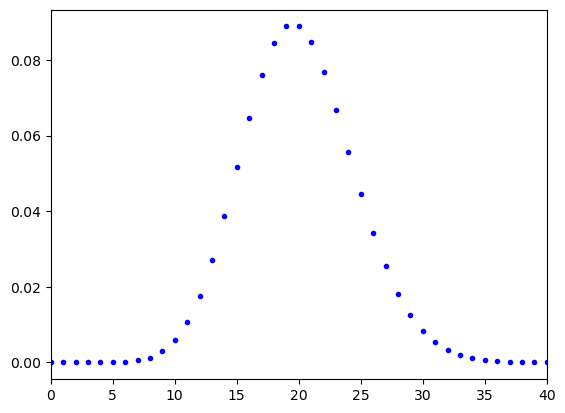

In [83]:
#poison plot
lamb = 20 #lambda

k = np.arange(0,2*lamb+1,1)

def Poisson_prob(k, lamb):
    return  np.exp(-lamb)*np.power(lamb, k, dtype = "float")/special.factorial(k)

plt.figure()
plt.plot(k, Poisson_prob(k, lamb), "b.")
plt.xlim(0,2*lamb)
plt.show()


## Practice
These questions will help you digest the information described above. The answers can be found at the end of this manual. Do not forget to look at the python assignments!

```{exercise}
:label: ex-1
:class: dropdown
Determine the mean, standard deviation and standard error of the following data sets:

* 0.10; 0.15; 0.18; 0.13 
* 25; 26; 30; 27; 19
* 3.05; 2.75; 3.28; 2.88
```

```{exercise}
:label: ex-2
:class: dropdown
Use Chauvenet's criterium to find out whether 19 in the previous task can be considered a real outlier.```

```{exercise}
:label: ex-3
:class: dropdown
Eric weighed a small cubic box. Its mass was 56 $\pm$ 2 grams. The box has sides of 3.0 $\pm$ 0.1 cm.

* Determine the gravitational force working on this box.
* Determine the volume of this box.
* Determine the density of this box.
* Evaluate whether the density is determined precisely enough to determine the material of the box.
```

```{exercise}
:label: ex-4
:class: dropdown
During an experiment the electrical power of a light bulb is determined by measuring the voltage over and current through the light bulb. The measurements are displayed in the table below:
\begin{table}[h!]\label{tb:ex4}
    \centering
    \begin{tabular}{c|c|c|c}
        $U$(V) & $\alpha_U$(V) & $I$(mA) & $\alpha_I$(mA)
\hline
        6.0 & 0.2 & 0.25 & 0.01
    \end{tabular}
    %\caption{Measurements on a light bulb}
\end{table}

* Determine the electrical power of the light bulb.
* Determine the resistance of the light bulb.
* If you could determine either voltage or current more precise, which would you choose and why?

```

```{exercise}
:label: ex-5
:class: dropdown
In the table below are the values given for constants $A, B$ and $C$. Determine in each of the following exercises the value and uncertainty of $Z$, use both the calculus and the functional approach. Describe in each exercise which uncertainty has the biggest influence on $\alpha_Z$.

\begin{table}[!ht]
\centering
\begin{tabular}{l|l|l|l|l|l}
\multicolumn{1}{r|}{A} & $\alpha_A$ & B   & $\alpha_B$ & C    & $\alpha_C$ 
 \hline
5                      & 0.1      & 500 & 2        & 1 & 0.1    
\end{tabular}
\end{table}


* $Z = \frac{A}{BC^2}$
* $Z = \frac{A}{BC^4}$
* $Z = C\sqrt{AB}$

```

```{exercise}
:label: ex-6
:class: dropdown
In the table below are values given for $a$ and $x$.

\begin{table}[H]
    \centering
    \begin{tabular}{l|l|l|l|}
        \multicolumn{1}{l|}{a} & $\alpha_a$        & x               & $\alpha_x$        
 \hline
        $5\cdot10^{-8}$        & $1\cdot10^{-9}$ & $5\cdot10^{-3}$ & $1\cdot10^{-3}$
    \end{tabular}
\end{table}


* Calculate the value and uncertainty of $F = a \cdot x^{-4}$.
* Do the same as in the previous exercise, but now calculate $\alpha_F$ for $\alpha_a  = 1 \cdot 10^{-9}$ and $\alpha_x  = 1 \cdot 10^{-4}$. What do you notice?
* Now let $\alpha_x$ be $1\cdot10^{-3}$ and take $\alpha_x = 1\cdot 10^{-3}$ and $\alpha_a = 1\cdot 10^{-10}$, what do you notice? 

```




## Assignment
The final assignment for Measurement and uncertainty consists of a Python Jupyter Notebook with questions. You are allowed to bring code, this manual, notes. If it concerns a morning session the assignment is available from 8:45. Handing in your work, using Brightspace, can be done until 11:30. If it concerns a afternoon session, the assignment is available from 13:45. Handing in your work, using Brightspace, can be done until 16:00. This information will be provided before the test as well.

